#### Supervised Learning

supervised learning is a very important (maybe the most) branch of machine learning

machine learning is the art and science of giving computers the ability to learn to make decisions from data without being explicitly programmed
for example a computer that learn to predict whether an email is spam or not spam based on the content and the sender, another is example is that your computer can learn to cluster wikipedia entries into different categories based on the words they contain and then it could assign any new wikipedia article to one of the existing clusters 
the first example tries to predict a particular class label, spam or not spam
the second example doesn't have a label

**spervised learning** uses labeled data, labels are present, we have several data points or samples which are described using predictor variables (features) and a target variable, data is usally represented in a table structure (a row for each data point and a column for each feature), the goal of supervised learning is to build a model that is able to predict the target variable (particular species of a flower) given the predictor variable (the physical measurements like petal length, petal width, sepal length, etc.)
- if the target variable has categories (like "spam" or "not spam") then the learning task is called **classification**
- if the target is a continuously varying variable (the price of a house) then it's a regression task
- the goal of supervised learning is to usually to automate a time-consuming or expensive manual task (a doctor's diagnosis) or to make predictions about the future (whether a customer will click on an ad or not)
- for supervised data you'll need labeled data which you can get from historical data (already has labels that you're interested in), you could perform experiments (A/B testing to see how many clicks you get), or you can use crowdsourced labeling data (like what reCAPTCHA does for text recognition)
- the overal goal is to learn from data for which the right output is known so that we can make predictions on new data for which we don't know the output
- we'll use scikit-learn/sklearn (a popular and user-friendly machine learning library for Python) for supervised learning in this course, it also integrates very well with the SciPy stack, including librarios such as NumPy, other ML libraries are TensorFlow and keras

**unsupervised learning** doesn't use labeled data, no labels are present, unspervised learning is the machine learning task of uncovering hidden patterns and structures from unlabeled data, for example a company may want to group customers into distinct categories (**clustering**) based on their purchasing behavior without knowing in advance what these categories might be

**reinforcement learning** machines or software agents interact with an environment, they learn how to automatically figure out how to optimize their behavior given a system of rewards and punishments, this draws inspiration from behavioral psychology, has applications in tons of fields including economics, genetics, and game playing 

**features** are also know as **predictor variables** and **independent variables**
the **target variable** is also know as the **response variable** and the **dependent variable** 

#### Exploratory Data Analysis

the iris dataset is included in scikit-learn and has 
- features of petal length, petal width, sepal length, sepal width
- a target variable of species which could be versicolor(1), virginica(2), or setosa(0)

In [2]:
from sklearn import datasets #for the iris dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') #sets the plotting style to ggplot (it looks great and is similar to R)


In [4]:
iris = datasets.load_iris()
type(iris)
# you'll see that the type is a Bunch, it's similar to a dictionary because it has key-value pairs 

# print the keys
print(iris.keys())
# you'll see that they're the feature names, the target names, the data (contains the values features), and the target (the target data)

# the feature and target data are NumPy arrays, which you can see by running type()
type(iris.data), type(iris.target)

# use .shape to find out rows and columns, sample are in rows and features are in columns
iris.data.shape

# see the index of the target names, versicolor(1), virginica(2), or setosa(0)
iris.target_names

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# perform some exploratory data analysis (EDA)

# assign the feature and target data to X and y respectively
X = iris.data #feature
y = iris.target #target

# build a dataframe of the feature data, pass in the column names
df = pd.DataFrame(X, columns=iris.feature_names)

# check out the first 5 rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


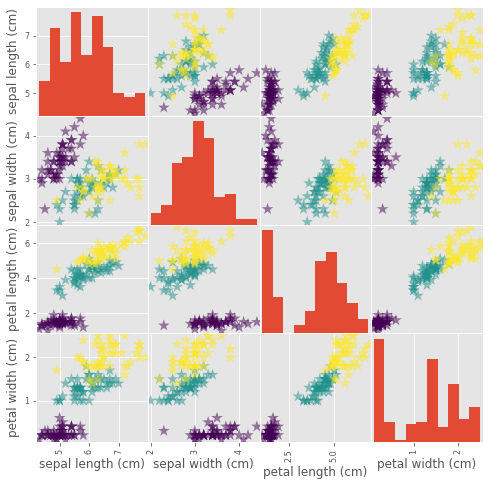

In [8]:
# persome some visual EDA

# visualize the dataset with the scatter matrix function from pandas
# pass in the dataframe, the target variable (to c for color so the data points will be colored by species), size, shape, marker 
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8, 8], s=150, marker='*')
# the result is a matrix of figures, the diagonals are histograms of the features corresponding to row and column
# the others are plots of the column feature versus row feature colored by the target variable
# if the colors are clustered then it means the flowers are clustered by species
# you could also not correlation such as that seen in the petal width and petal length intersections

In [ ]:
# visual EDA when the features in the dataset are binary, such as voting yes or no, 0 or 1
# use a countplot
plt.figure() #draws a new figure so if you do multiple then they won't overlap
# party is the target variable, this will show the difference in voting behavior between the 2 parties for the education bill
sns.countplot(x='education', hue='party', data=df, palette='RdBu') #red is rep, blue is demo
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

#### The Classification Challenge

we now have a set of labeled data and we want to build a classifier that takes unlabeled data as input and outputs a label

to construct this classifier you first need to choose a type of classifier and it needs to learn from the already labeled data, because of this, the already labeled data is called the training data

the **k-nearest neightbors** (KNN) algorithm is used to predict the label of any data point by looking at the K closest labeled data points and having them vote on what label the unlabeled point should have, knn essential creates a set of decision boundaries 

all machine learning models in scikit-learn are implemented as python classes, they serve 2 purposes: they implement the algorithms for learning a a model and predicting while also storing all the information that is learned from the data

**training** the model on the data is also called **fitting** the model to the data 

In [11]:
# use scikit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate the KNeighhborsClassifier, set the number of neighbors, and assign it to a variable
knn = KNeighborsClassifier(n_neighbors=6)
# fit the classifier to the training set (the labeled data), pass the features and labels (target), both as NumPy arrays
# the scikit-learn API requires that the data be a NumPy array or pandas DataFrame and that the features take on continuous valaues
# such as the price of a house, and not categories like male/female
# it also requires that there aren't any missing values in the data
knn.fit(iris['data'], iris['target'])

# you could check the number of observations to ensure that they match
iris['data'].shape
iris['target'].shape

# the classifier will return the classifier itself and modify it to fit it to the data 

(150,)

In [12]:
# now that the classifier is fit, use it to predict on some unlabeled data
X_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)
X_new.shape # check the shape to see there's 3 rows (observations) and 4 columns (features)
# you would then expect this to return a 3x1 array with a prediction for each row (observation) in X-new
# 1, 1, 0 means versicolor for the first two observations and 0 for the last which is setosa

In [ ]:
# example exercise
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable, .values ensures X and y are NumPy arrays (with out it X is a DataFrame and y is a Series)
y = df['party'].values
X = df.drop('party', axis=1).values #drops party from the features array since it's the target

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

In [ ]:
# example exercise, make predictions with some new data
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

#### Measuring Model Performance

problem: there's no unlabeled data since it was all used to fit the model, how sure can you be of the predictions? how can you measure the performance? we need a metric!

in classification problems, accuracy is a commonly used metric, the accuracy of a classifier is the fraction of correct predictions divided by the total number of data points 
buuuuut, which data do we use to compute accuracy? what we really want is to know how well the model will perform on new data (samples that the algorithm has never seen before), the solution will be to split the data into two sets, training and test

fit/train the classifier on the training set then make predictions on the labeled test set and compare these predictions with the known labels, finally you can compute the accuracy of the predictions 

as K increases (more neighbors) the decision boundry will get smoother but you'll also get a less complex model than thase with a lower K
a smaller K means a more complex model and it can lead to overfitting, could be sensitive to noise in the specific data that you have instead of reflecting general treds in the data 
if you increase K even more (making the model simpler) then the model will perform less well on both test and training sets because of underfitting
you want that sweet spot in the middle that gives the best performance on the test set (see the model complexity curve)

In [ ]:
# train/test split
from sklearn.model_selection import train_test_split

# randomly split the data, first argument is the feature data, next is the targets or labels, random state is the seed
# the default split size is 75% training data and 25% test data
# stratify the y (the list or array that contains the labels) so that the labels will be distributed in the train and test sets the same way as they are in the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
# this will return 4 arrays: the training data, the test data, the training labels, and the test labels which are unpacked in the variables above

# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=8)
# fit it to the training data
knn.fit(X_train, y_train)
# make predictions on the test data and store in y_pred variable
y_pred = knn.predict(X_test)
# print em
print(\"Test set predictions:\\n {}\".format(y_pred))
# you'll see that these take on 3 values: 0, 1, 2, just as expected

# check the accuracy of the model
knn.score(X_test, y_test)
# the result would show about 95% which is pretty good for an out-of-the-box model
      

In [ ]:
# example exercise of multi-class classification (more than just binary classification)
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset, you can use dot notation like below or digits['images']
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
# example exercise, now you can build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset

# create arrays for the features and target variable, split them, fit, compute accuracy
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

In [ ]:
# example exercise, create a model complexity curve for a variety of different neighbor values on the training and testing accuracy scores

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# you would see that test accuracy is highest when using 3 and 5 neighbors, 8 or more results in a simple model that underfits the data